# Phase N=°1

In [61]:
import numpy as np 
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

## 1-Faites une analyse exploratoire des données:¶
(valeurs manquantes, données redondantes,transformations des données,...etc.).

In [62]:
#lire la base de données à partir du fichier csv
df=pd.read_csv('Phase2.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25192 non-null  int64  
 1   protocol_type                25192 non-null  object 
 2   service                      25192 non-null  object 
 3   flag                         25192 non-null  object 
 4   src_bytes                    25192 non-null  int64  
 5   dst_bytes                    25192 non-null  int64  
 6   land                         25192 non-null  int64  
 7   wrong_fragment               25192 non-null  int64  
 8   urgent                       25192 non-null  int64  
 9   hot                          25192 non-null  int64  
 10  num_failed_logins            25192 non-null  int64  
 11  logged_in                    25192 non-null  int64  
 12  num_compromised              25192 non-null  int64  
 13  root_shell      

In [63]:
#dimensions : nombre de lignes, nombre de colonnes
#la ligne d'en-tête n'est pas comptabilisée
#dans le nombre de lignes
print(df.shape)

(25192, 42)


In [64]:
#Class Target Elle contient Quoi?
df['class'].value_counts()

normal     13449
anomaly    11743
Name: class, dtype: int64

In [65]:
#Afficher les statistiques 
df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,25192.000000,2.519200e+04,2.519200e+04,25192.000000,25192.000000,25192.00000,25192.000000,25192.000000,25192.000000,25192.000000,...,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000
mean,305.054104,2.433063e+04,3.491847e+03,0.000079,0.023738,0.00004,0.198039,0.001191,0.394768,0.227850,...,182.532074,115.063036,0.519791,0.082539,0.147453,0.031844,0.285800,0.279846,0.117800,0.118769
std,2686.555640,2.410805e+06,8.883072e+04,0.008910,0.260221,0.00630,2.154202,0.045418,0.488811,10.417352,...,98.993895,110.646850,0.448944,0.187191,0.308367,0.110575,0.445316,0.446075,0.305869,0.317333
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,84.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,255.000000,61.000000,0.510000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.790000e+02,5.302500e+02,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42862.000000,3.817091e+08,5.151385e+06,1.000000,3.000000,1.00000,77.000000,4.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [66]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [67]:
#Mélanger le dataset pour assurer dans la phase de découpage j'ai les 2 Type anomaly et normal
from sklearn.utils import shuffle
df = shuffle(df)
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
16446,0,tcp,http,SF,321,737,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
11863,0,tcp,http,SF,246,4686,0,0,0,0,...,255,1.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,normal
21208,0,tcp,other,REJ,0,0,0,0,0,0,...,1,0.00,1.00,0.00,0.00,0.09,0.00,0.86,1.00,anomaly
399,0,tcp,time,SF,0,4,0,0,0,0,...,25,1.00,0.00,0.04,0.00,0.08,0.08,0.04,0.04,normal
10737,0,tcp,http,SF,222,21953,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19500,13,tcp,X11,SF,405412,38492,0,0,0,0,...,18,0.07,0.03,0.00,0.00,0.00,0.00,0.00,0.00,normal
14554,0,tcp,http,SF,54540,8314,0,0,0,2,...,57,1.00,0.00,0.02,0.00,0.02,0.02,0.02,0.02,anomaly
9293,0,tcp,http,SF,224,383,0,0,0,0,...,255,1.00,0.00,0.01,0.01,0.00,0.01,0.00,0.00,normal
16553,0,tcp,ftp_data,S0,0,0,0,0,0,0,...,63,0.25,0.02,0.00,0.00,1.00,1.00,0.00,0.00,anomaly


pré_traitement 

In [68]:
#les valeur manquantes
df.isnull().any()

duration                       False
protocol_type                  False
service                        False
flag                           False
src_bytes                      False
dst_bytes                      False
land                           False
wrong_fragment                 False
urgent                         False
hot                            False
num_failed_logins              False
logged_in                      False
num_compromised                False
root_shell                     False
su_attempted                   False
num_root                       False
num_file_creations             False
num_shells                     False
num_access_files               False
num_outbound_cmds              False
is_host_login                  False
is_guest_login                 False
count                          False
srv_count                      False
serror_rate                    False
srv_serror_rate                False
rerror_rate                    False
s

In [69]:
#Voir les Répition des lignes
df.duplicated()

16446    False
11863    False
21208    False
399      False
10737    False
         ...  
19500    False
14554    False
9293     False
16553    False
8298     False
Length: 25192, dtype: bool

In [70]:
df[df.duplicated()].head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class


c:\users\imene\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='dst_host_serror_rate'>

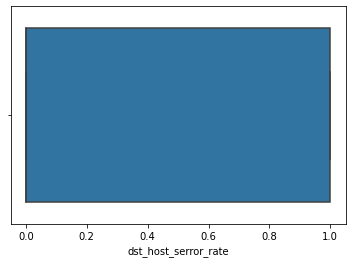

In [71]:
#chercher les donnes abérente normalment en vérifier tout les colonnes dans le principe de data scientist
import seaborn as sns
import os
sns.boxplot(df['dst_host_serror_rate'])

c:\users\imene\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='wrong_fragment'>

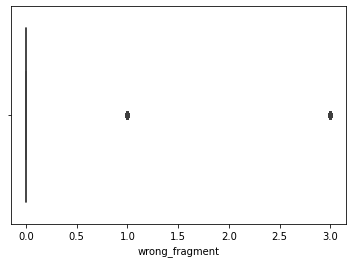

In [72]:
sns.boxplot(df['wrong_fragment'])#C'est pas une donnés abé car elle a uniquement 2 val

c:\users\imene\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='is_host_login'>

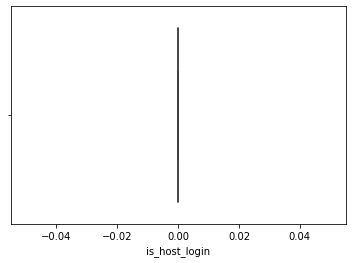

In [73]:
sns.boxplot(df['is_host_login'])

c:\users\imene\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='srv_count'>

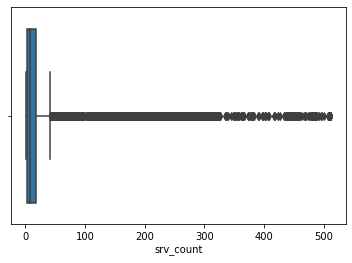

In [74]:
sns.boxplot(df['srv_count'])

c:\users\imene\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='root_shell'>

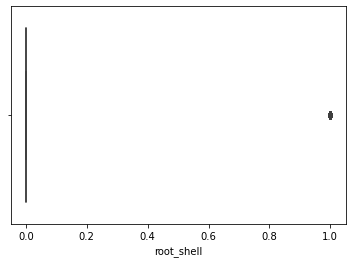

In [75]:
sns.boxplot(df['root_shell'])

In [76]:
df['dst_host_serror_rate'].describe()

count    25192.000000
mean         0.285800
std          0.445316
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: dst_host_serror_rate, dtype: float64

In [77]:
#afficher les variables catégorique 
df.describe(include='O')

,protocol_type,service,flag,class
count,25192,25192,25192,25192
unique,3,66,11,2
top,tcp,http,SF,normal
freq,20526,8003,14973,13449


In [78]:
#changer les variable de type objet 
from sklearn.preprocessing import LabelEncoder 
  
le = LabelEncoder() 
  
df['protocol_type']= le.fit_transform(df['protocol_type']) 
df['service']= le.fit_transform(df['service'])
df['flag']= le.fit_transform(df['flag'])
df['class']= le.fit_transform(df['class'])


# Les Changement Apportes aux Données sont

-Suppression de la Colonnes Unnamed : 0 ce qui donne 42 colonnes -Augmentation des données a traite a 25192 -Service contien 66 unique au lieux de 51 et flag 11 au lieux de 10 -Nous remarquons que normal=13449 et présanse multiple d'anomaly=11743 pas de manque comme dans phase1=150,ce qui donnes une meilleur expectation des résultat .

## 2-Est-ce que ce changement a un impact sur les performances du classificateur

Pour répondre a cette question nous devons en vas refaire l'apprentissage avec 30% et voir le résultat

In [79]:
##Récupérer toutes les lignes et toutes les colonnes sauf class
X = df.drop('class', axis= 1)
#Récupérer la colonne class qui représente le target et stocker la dans la vaiable y
y = df['class']


In [80]:
#afficher Y
y

16446    1
11863    1
21208    0
399      1
10737    1
        ..
19500    1
14554    0
9293     1
16553    0
8298     0
Name: class, Length: 25192, dtype: int32

In [81]:
##Décomposer le dataset en 30% pour le test et 70% pour le train
from sklearn.model_selection import train_test_split
X = df.drop('class', axis= 1)
y = df['class']
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y, test_size=0.3, random_state=0)

In [82]:
#
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X=scaler.transform(X)

In [83]:
from sklearn import neighbors, metrics
from sklearn import model_selection


In [84]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors':[1]}

In [85]:
# Choisir un score à optimiser, ici l'accuracy (proportion de prédictions correctes)
score = 'accuracy'
clf = model_selection.GridSearchCV(
    neighbors.KNeighborsClassifier(), # un classifieur kNN
    param_grid,     # hyperparamètres à tester
    cv=5,           # nombre de folds de validation croisée
    scoring=score   # score à optimiser
)


In [86]:
# Optimiser ce classifieur sur le jeu d'entraînement
clf.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1]}, scoring='accuracy')

In [87]:
y_pred = clf.predict(X_test)

In [88]:
from sklearn.metrics import confusion_matrix


In [89]:
from sklearn.metrics import classification_report , confusion_matrix
from sklearn import metrics
print (classification_report(y_test,y_pred))
print (confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3523
           1       0.99      0.99      0.99      4035

    accuracy                           0.99      7558
   macro avg       0.99      0.99      0.99      7558
weighted avg       0.99      0.99      0.99      7558

[[3497   26]
 [  32 4003]]


## 4-La Précision,Le Rappel,Le F1

In [90]:

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score , precision_score
accurancy = accuracy_score(y_test, y_pred)
print ('Accuracy:', accurancy)
f1_score = f1_score(y_test, y_pred,average='weighted')
print ('f1_score:',f1_score)
recall = recall_score(y_test, y_pred, average='weighted')
print ('recall_score:', recall)
print('precision=',precision_score(y_test,y_pred))

Accuracy: 0.9923260121725325
f1_score: 0.9923264218669539
recall_score: 0.9923260121725325
precision= 0.9935467858029288


## 5-Est-ce que ce changement a un impact sur les performances du classificateur? 


Oui il ya un changement coté pérformance nous remarquons que la precision et recall et f2 en augmenter en ce qui concerne anomaly de 0.8 a 0.99  ce qui donne une meilleur performance par rapport a la phase 1,aussi le data set et mieux équiliré entre anomaly et normal.

In [134]:
#afficher tout le data set
pd.set_option('display.max_rows',df.shape[0]+1)
